In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%matplotlib notebook

from mle_toolbox.utils import load_result_logs

# Load in Meta-Log .hdf5 file storing all individual runs

In [2]:
# Load log and get overview of different logged runs
meta_log, hyper_log = load_result_logs("../examples/experiments/ode/")
list(meta_log.b_1_eval_3.time.keys())

['step_counter', 'time_elapsed']

In [3]:
# And here are the different items stored in the log
print("Outer level:", meta_log.b_1_eval_0.keys())
print("Meta level:", meta_log.b_1_eval_0.meta.keys())
print("Time level:", meta_log.b_1_eval_0.time.keys())
print("Stats level:", meta_log.b_1_eval_0.stats.keys())

Outer level: odict_keys(['meta', 'stats', 'time'])
Meta level: odict_keys(['config_fname', 'eval_id', 'experiment_dir', 'fig_storage_paths', 'log_paths', 'model_ckpt', 'model_type', 'seeds'])
Time level: odict_keys(['step_counter', 'time_elapsed'])
Stats level: odict_keys(['integral', 'noise'])


In [4]:
# The meta data stores all the data relevant for recovering parts of the experiment
meta_log.b_1_eval_0.meta.model_ckpt

array(['experiments/ode/21-03-26_b_1_eval_0/models/final/21-03-26_b_1_eval_0_seed_202577',
       'experiments/ode/21-03-26_b_1_eval_0/models/final/21-03-26_b_1_eval_0_seed_481491'],
      dtype='<U200')

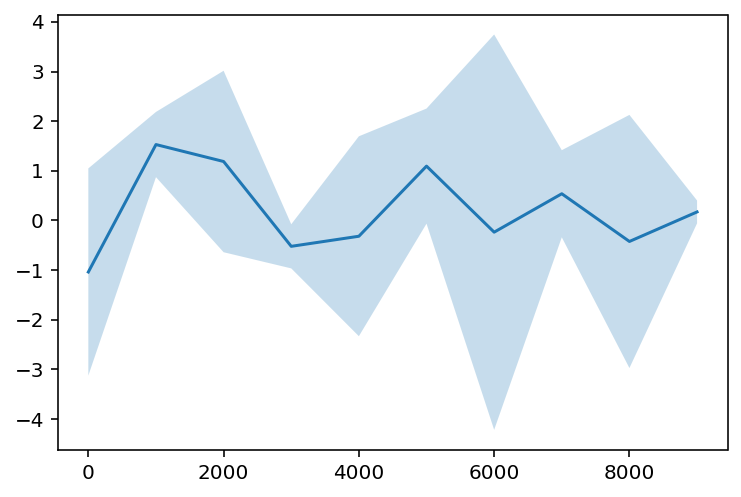

In [5]:
# If you want to get access to a specific variable just index it!
import matplotlib.pyplot as plt
plt.plot(meta_log.b_1_eval_0.time.step_counter.mean,
         meta_log.b_1_eval_0.stats.noise.mean)
plt.fill_between(meta_log.b_1_eval_0.time.step_counter.mean,
                 meta_log.b_1_eval_0.stats.noise.mean 
                 - 2 * meta_log.b_1_eval_0.stats.noise.std,
                 meta_log.b_1_eval_0.stats.noise.mean 
                 + 2 * meta_log.b_1_eval_0.stats.noise.std,
                 alpha=0.25)

# Visualize a Time Series/Learning Curve

/Users/rtl/anaconda2/envs/ma-vision/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/rtl/anaconda2/envs/ma-vision/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


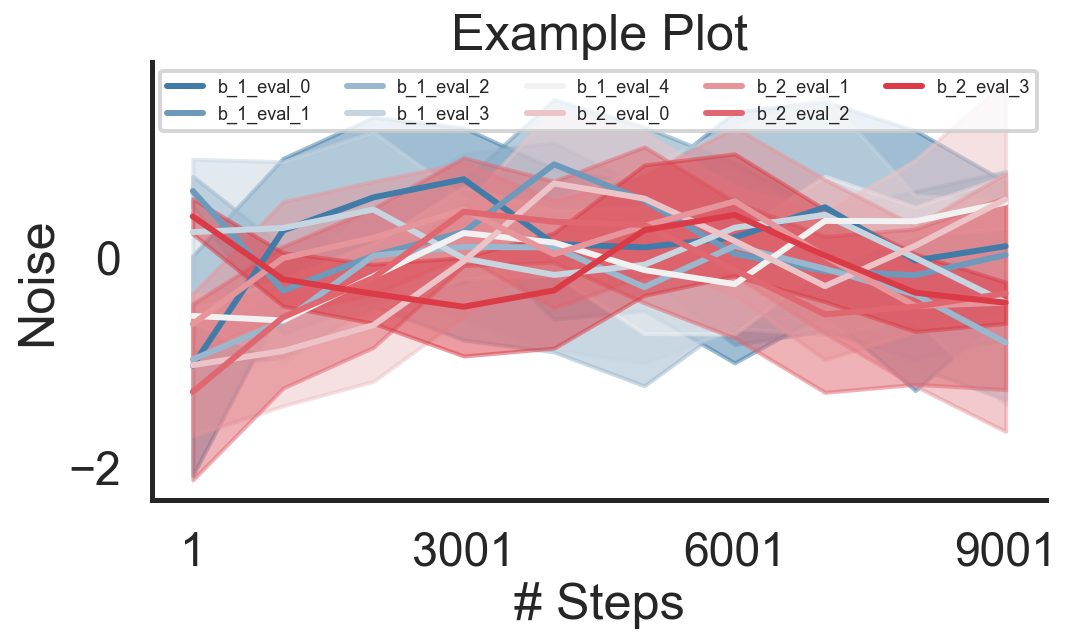

In [6]:
from mle_toolbox.visualize import visualize_1D_lcurves

fig, ax = visualize_1D_lcurves(meta_log,
                               iter_to_plot="step_counter",
                               target_to_plot="noise",
                               smooth_window=3,
                               plot_title= "Example Plot",
                               xy_labels = [r"# Steps",
                                            r"Noise"],
                               base_label=r"{}",
                               curve_labels=[],
                               every_nth_tick= 3,
                               plot_std_bar= True)
ax.legend(ncol=5, fontsize=9)

# Load in Hyper-DF .pkl file 
## Stores all the hyperparameters of runs and more details

In [9]:
hyper_log.columns

Index(['noise_mean', 'x_0', 'time_elapsed', 'run_id', 'integral', 'noise',
       'log_paths', 'experiment_dir', 'config_fname', 'model_ckpt', 'seeds',
       'model_type', 'fig_storage_paths', 'log_fname'],
      dtype='object')

In [10]:
hyper_log.log_paths.iloc[0]

array(['experiments/ode/21-03-26_b_1_eval_0/logs/21-03-26_b_1_eval_0_seed_202577.hdf5',
       'experiments/ode/21-03-26_b_1_eval_0/logs/21-03-26_b_1_eval_0_seed_481491.hdf5'],
      dtype='<U200')

In [11]:
hyper_log.model_type

0    no-model-type-provided
1    no-model-type-provided
2    no-model-type-provided
3    no-model-type-provided
4    no-model-type-provided
5    no-model-type-provided
6    no-model-type-provided
7    no-model-type-provided
8    no-model-type-provided
Name: model_type, dtype: object

In [12]:
# Take a lookilooki - You can easily access checkpoints/individual logs 
# from the hyper_df
hyper_log

,noise_mean,x_0,time_elapsed,run_id,integral,noise,log_paths,experiment_dir,config_fname,model_ckpt,seeds,model_type,fig_storage_paths,log_fname
0,0.000,1.0,29.339202,b_1_eval_0,0.028028,0.171498,[experiments/ode/21-03-26_b_1_eval_0/logs/21-0...,experiments/ode/21-03-26_b_1_eval_0/,experiments/ode/21-03-26_b_1_eval_0/21-03-26_b...,[experiments/ode/21-03-26_b_1_eval_0/models/fi...,"[202577, 481491]",no-model-type-provided,[experiments/ode/21-03-26_b_1_eval_0/figures/f...,experiments/ode/21-03-26_b_1_eval_0/logs/b_1_e...
1,0.000,5.5,29.339202,b_1_eval_1,0.088432,0.346565,[experiments/ode/21-03-26_b_1_eval_1/logs/21-0...,experiments/ode/21-03-26_b_1_eval_1/,experiments/ode/21-03-26_b_1_eval_1/21-03-26_b...,[experiments/ode/21-03-26_b_1_eval_1/models/fi...,"[202577, 481491]",no-model-type-provided,[experiments/ode/21-03-26_b_1_eval_1/figures/f...,experiments/ode/21-03-26_b_1_eval_1/logs/b_1_e...
2,0.000,10.0,29.339202,b_1_eval_2,0.099867,-0.921929,[experiments/ode/21-03-26_b_1_eval_2/logs/21-0...,experiments/ode/21-03-26_b_1_eval_2/,experiments/ode/21-03-26_b_1_eval_2/21-03-26_b...,[experiments/ode/21-03-26_b_1_eval_2/models/fi...,"[202577, 481491]",no-model-type-provided,[experiments/ode/21-03-26_b_1_eval_2/figures/f...,experiments/ode/21-03-26_b_1_eval_2/logs/b_1_e...
3,0.005,1.0,29.339202,b_1_eval_3,0.097334,-1.386956,[experiments/ode/21-03-26_b_1_eval_3/logs/21-0...,experiments/ode/21-03-26_b_1_eval_3/,experiments/ode/21-03-26_b_1_eval_3/21-03-26_b...,[experiments/ode/21-03-26_b_1_eval_3/models/fi...,"[202577, 481491]",no-model-type-provided,[experiments/ode/21-03-26_b_1_eval_3/figures/f...,experiments/ode/21-03-26_b_1_eval_3/logs/b_1_e...
4,0.005,5.5,29.339202,b_1_eval_4,0.116372,0.799334,[experiments/ode/21-03-26_b_1_eval_4/logs/21-0...,experiments/ode/21-03-26_b_1_eval_4/,experiments/ode/21-03-26_b_1_eval_4/21-03-26_b...,[experiments/ode/21-03-26_b_1_eval_4/models/fi...,"[202577, 481491]",no-model-type-provided,[experiments/ode/21-03-26_b_1_eval_4/figures/f...,experiments/ode/21-03-26_b_1_eval_4/logs/b_1_e...
5,0.005,10.0,25.277575,b_2_eval_0,0.071071,0.909490,[experiments/ode/21-03-26_b_2_eval_0/logs/21-0...,experiments/ode/21-03-26_b_2_eval_0/,experiments/ode/21-03-26_b_2_eval_0/21-03-26_b...,[experiments/ode/21-03-26_b_2_eval_0/models/fi...,"[202577, 481491]",no-model-type-provided,[experiments/ode/21-03-26_b_2_eval_0/figures/f...,experiments/ode/21-03-26_b_2_eval_0/logs/b_2_e...
6,0.010,1.0,25.277575,b_2_eval_1,0.042320,0.958517,[experiments/ode/21-03-26_b_2_eval_1/logs/21-0...,experiments/ode/21-03-26_b_2_eval_1/,experiments/ode/21-03-26_b_2_eval_1/21-03-26_b...,[experiments/ode/21-03-26_b_2_eval_1/models/fi...,"[202577, 481491]",no-model-type-provided,[experiments/ode/21-03-26_b_2_eval_1/figures/f...,experiments/ode/21-03-26_b_2_eval_1/logs/b_2_e...
7,0.010,5.5,25.277575,b_2_eval_2,0.049282,-0.312394,[experiments/ode/21-03-26_b_2_eval_2/logs/21-0...,experiments/ode/21-03-26_b_2_eval_2/,experiments/ode/21-03-26_b_2_eval_2/21-03-26_b...,[experiments/ode/21-03-26_b_2_eval_2/models/fi...,"[202577, 481491]",no-model-type-provided,[experiments/ode/21-03-26_b_2_eval_2/figures/f...,experiments/ode/21-03-26_b_2_eval_2/logs/b_2_e...
8,0.010,10.0,25.277575,b_2_eval_3,0.078659,0.157580,[experiments/ode/21-03-26_b_2_eval_3/logs/21-0...,experiments/ode/21-03-26_b_2_eval_3/,experiments/ode/21-03-26_b_2_eval_3/21-03-26_b...,[experiments/ode/21-03-26_b_2_eval_3/models/fi...,"[202577, 481491]",no-model-type-provided,[experiments/ode/21-03-26_b_2_eval_3/figures/f...,experiments/ode/21-03-26_b_2_eval_3/logs/b_2_e...


# Plot 2D Heatmap of tracked variable

(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb4c6331438>)

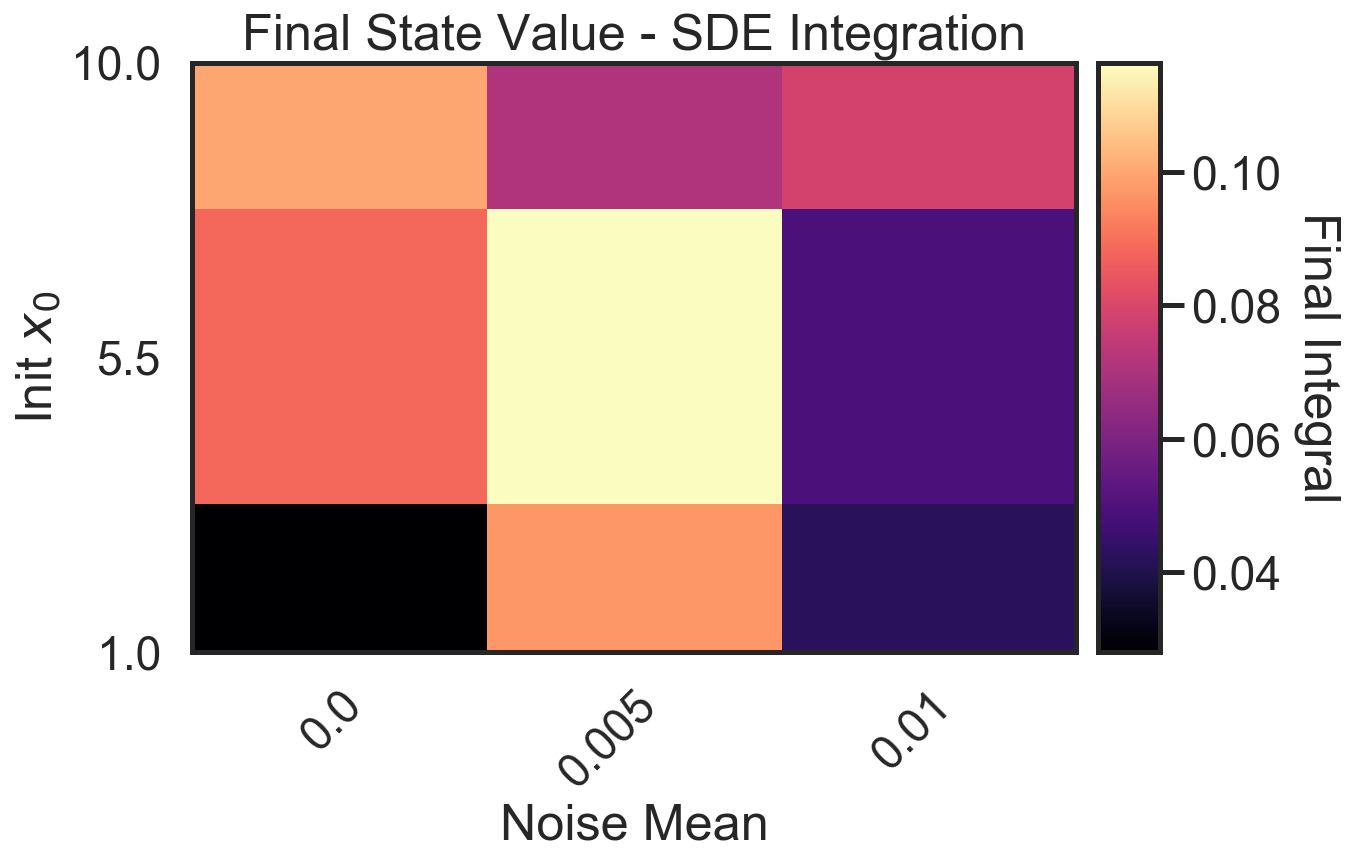

In [14]:
from mle_toolbox.visualize import visualize_2D_grid
fixed_params = None
params_to_plot = ["noise_mean", "x_0"]
target_to_plot = "integral"
visualize_2D_grid(hyper_log, fixed_params, params_to_plot, target_to_plot,
                  plot_title=r'Final State Value - SDE Integration',
                  xy_labels=[r'Noise Mean', r'Init $x_0$'],
                  variable_name='Final Integral',
                  every_nth_tick=1, round_ticks=3,
                  text_in_cell=False, max_heat=None)

# Experiment Report Generation

In [ ]:
from mle_toolbox.report_experiment import auto_generate_reports
from mle_toolbox.protocol import load_local_protocol_db
from dotmap import DotMap

In [ ]:
db, all_experiment_ids, last_experiment_id = load_local_protocol_db()
e_id = all_experiment_ids[-1]
report_data = DotMap(db.get(e_id))
report_data.job_spec_args.eval_metrics

In [ ]:
reporter = auto_generate_reports(e_id)

In [ ]:
try:
    from wand.image import Image as WImage
except:
    !pip install Wand
    from wand.image import Image as WImage
img = WImage(filename=reporter.pdf_report_fname)
img

# VAE Log with different stored checkpoints

In [ ]:
# Load log and get overview of different logged runs
meta_log = load_log("experiments/vae/meta_log.hdf5")
print(meta_log.b_1_eval_0.meta.top_k_performance)
print(meta_log.b_1_eval_0.meta.top_k_ckpt_list)

In [ ]:
hyper_df = hyper_log_to_df("experiments/vae/hyper_log.pkl")
hyper_df

# Subselect the Meta Log and the Hyper Log

In [15]:
from mle_toolbox.utils import subselect_hyper_log, subselect_meta_log

In [ ]:
# TODO: Add examples!